In [1]:
import os
from collections import Counter

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Image Dataset and Groundtruth Creation

In [2]:
image_ids = pd.DataFrame()

normal_images = os.listdir('../data/bronze/train/NORMAL/')
pneumo_images = os.listdir('../data/bronze/train/PNEUMONIA/')

images = normal_images + pneumo_images
images_ids = [1]*len(normal_images) + [0]*len(pneumo_images)

image_ids['Image'] = images
image_ids['label'] = images_ids

__Labels: 1 - Normal Xray image // 0 - Pneumonia Xray image__

In [3]:
image_ids.head()

,Image,label
0,NORMAL2-IM-0604-0001.jpeg,1
1,NORMAL2-IM-0987-0001.jpeg,1
2,NORMAL2-IM-0537-0001.jpeg,1
3,NORMAL2-IM-1064-0001.jpeg,1
4,NORMAL2-IM-0776-0001.jpeg,1


### Sanity Check

We will just check for duplicated images

In [4]:
print(f'Number of duplicated images: {image_ids.duplicated().sum()}')

Number of duplicated images: 0


### Check Label Distribution

In [5]:
image_ids['label'].value_counts() / image_ids.shape[0]

0    0.742906
1    0.257094
Name: label, dtype: float64

Looks like we will need to deal with the class imbalacing problem.

Either we extend the dataset with more examples of the less represented class through data augmentation or we weight each instances with respect to their class

In [8]:
image_ids.to_csv('../data/silver/train_df')

### Visualizations

In order to get the sense of the data, we will images of both classes.

Normal image id: NORMAL2-IM-0727-0001.jpeg


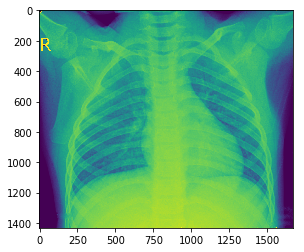

Pneumonia Image id: person482_bacteria_2043.jpeg


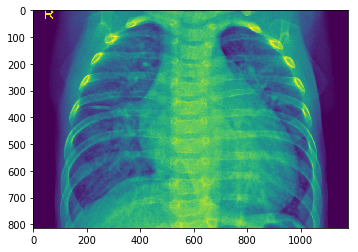

In [31]:
# Normal Image Selection

normal_instances = image_ids.loc[image_ids['label'] == 1].index

selected_instance = np.random.randint(low=min(normal_instances), high=max(normal_instances), size=1)

random_normal_image = image_ids.loc[int(selected_instance)]['Image']


# Pneumonia Image Selection

pneumo_instances = image_ids.loc[image_ids['label'] == 0].index

selected_instance = np.random.randint(low=min(pneumo_instances), high=max(pneumo_instances), size=1)

random_pneumo_image = image_ids.loc[int(selected_instance)]['Image']


# Image display

print(f'Normal image id: {random_normal_image}')

image = plt.imread(f'../data/bronze/train/NORMAL/{random_normal_image}')

plt.imshow(image)
plt.show()

print(f'Pneumonia Image id: {random_pneumo_image}')

image = plt.imread(f'../data/bronze/train/PNEUMONIA/{random_pneumo_image}')

plt.imshow(image)
plt.show()

From displaying different images, we can see that usually Pneumonia Xrays seem to be more misty that healthy Xrays

### Dimension Assessment

In order to feed the images to a Neural Network Model, the images need to have the same shape

__Acessing channel number__

In [74]:
labels = {0: 'PNEUMONIA', 1: 'NORMAL'}

channel_nr = []

for line in range(image_ids.shape[0]):
    
    label = labels[image_ids.loc[line]['label']]
    
    image_id = image_ids.loc[line]['Image']
    
    image_arr = plt.imread(f'../data/bronze/train/{label}/{image_id}')
    
    if len(image_arr.shape) == 2:
        
        channel_nr.append(1)
        
    elif len(image_nr.shape) == 3 and image_arr.shape[2] == 3:
        
        channel_dims.append(3)
    
print(Counter(channel_nr))

Counter({1: 4933, 3: 283})


In [76]:
# Inspect if all images were analyzed

print(4933 + 283 == image_ids.shape[0])

True


__Acessing channel dimension__

In [90]:
labels = {0: 'PNEUMONIA', 1: 'NORMAL'}

channel_dims = []

for line in range(image_ids.shape[0]):
    
    label = labels[image_ids.loc[line]['label']]
    
    image_id = image_ids.loc[line]['Image']
    
    image_arr = plt.imread(f'../data/bronze/train/{label}/{image_id}')
    
    channel_dims.append(image_arr.shape[0:2])
    
print(len(list(Counter(channel_dims).keys())))

4366


The training set holds 5216 images, and we have 4366 different image dimensions!

Therefore, most of the images, have a channel dimension that's unique among the training set!!

__Dimension Analysis__

It's mandatory that not only the images are resized to a common dimmension among the training instances,

but also that they exhibit 3 channels. In this stage, we aim to obtain the target width and height in order to perform resizing.

In [91]:
labels = {0: 'PNEUMONIA', 1: 'NORMAL'}

width_dims, height_dims = [], []

for line in range(image_ids.shape[0]):
    
    label = labels[image_ids.loc[line]['label']]
    
    image_id = image_ids.loc[line]['Image']
    
    image_arr = plt.imread(f'../data/bronze/train/{label}/{image_id}')
    
    width_dims.append(image_arr.shape[0])
    
    height_dims.append(image_arr.shape[1])

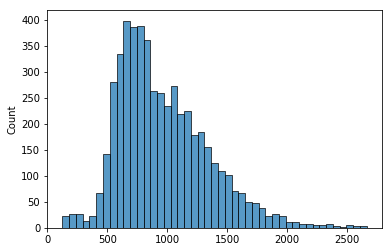

In [96]:
# Width dimension

sns.histplot(data=width_dims)

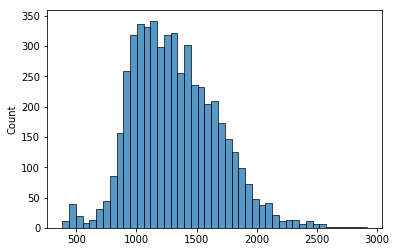

In [97]:
# Height dimension

sns.histplot(data=height_dims)

The distribuiton of the width and height seem to be gaussian or close to it.

The mean would be a good estimate, but we dont want to put much weight on the extremes of the curves and follow the central tendency

Therefore, we're picking the median

In [105]:
target_size = (np.median(width_dims), np.median(height_dims))

print(target_size)

(888.0, 1284.0)


We're done here! Let's move to the scripts